# More Pandas

In [ ]:
import pandas as pd
titanic_df = pd.read_csv("pythonworkshop.csv")
#titanic_df

## Summarizing our Dataframe

There's **891 observations** in this dataframe, and sometimes you are going to be working with **5,000**, **500,000** or **5 million observations**. <br> <br>Let's take a look at some functions to help us summarize!

#### *info()*

-prints a summary of a Dataframe, giving us info about each column <br>
-helps us learn more about the dataset before we start <br>
-tells us: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-# of non-null values in each columns <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-datatype of each column ( ints, floats, or strings)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Class        891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         779 non-null    float64
 8   Cabin        204 non-null    object 
 9   Port         889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


### Examining Distribution of Numerical Features

#### *describe()*:
-generates descriptive statistics about numerical and/or categorical features <br>
-excludes **null** values

In [ ]:
titanic_df.describe(percentiles = [0.01,0.1, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,50%,90%,99%,max
PassengerId,891.0,446.000000,257.353842,1.00,9.9,90.00,446.0,802.0000,882.100000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0,0.00,0.0,1.0000,1.000000,1.0000
Class,891.0,2.308642,0.836071,1.00,1.0,1.00,3.0,3.0000,3.000000,3.0000
Age,714.0,29.699118,14.526497,0.42,1.0,14.00,28.0,50.0000,65.870000,80.0000
Fare,779.0,31.164612,47.741674,0.00,0.0,7.55,14.4,77.2875,250.788724,512.3292


Observations of *describe()*: <br>
-*.T* is the transpose of the data frame (swaps rows and columns around) <br>
-can specify percentiles with this parameter: *percentiles = [0.01,0.1,0.9,0.99, ....]* <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-useful to find trends/distribution in data <br> <br>

**Question**: What columns are we missing from our dataset? What do those columns have in common? <br>(hint: look at our info() summary)

In [ ]:
#answer

### Examining Distribution of Categorical Features

In [ ]:
titanic_df.describe(include = ['O']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Port,889,3,S,644


Note: the *'O'* stands for columns that have object data type (remember the summary specifies the types of the column) <br>

To learn more about the different parameters of *describe()*, check out: <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

## What are some possible features that might have correlation?

In [ ]:
titanic_df.corr()
#creates a correlation matrix of all the correlation pairs of all the columns

,PassengerId,Survived,Class,Age,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.000892
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.254752
Class,-0.035144,-0.338481,1.000000,-0.369226,-0.553901
Age,0.036847,-0.077221,-0.369226,1.000000,0.123293
Fare,0.000892,0.254752,-0.553901,0.123293,1.000000


REMEMBER: correlation measures the strength of the linear 
relationship between two variables



### How to go about looking at the relation between two binary features, like sex and survived?

Question: What's the proportions of males that survived and did not survive?


Approach:
1. Filter out all the females
2. Get the survived column of all those males
3. Count the unique values in the column (use value_counts(), and look at it's documentation below)
4. Convert into proportions (look at the documentation of value_counts() https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts) <br>

Note that the documentation says Series.value_counts(), which means you must call the function on a series/column

In [ ]:
#try it out here

# Matplotlib & Seaborn: Let's Visualize Data!!

In [ ]:
#as always, import the packages first
import seaborn as sns
import matplotlib.pyplot as plt

## plot() 

-to plot y versus x as lines and/or markers <br>
-If we only specify one array in the function, then that will represent the y-coordinates of the data points

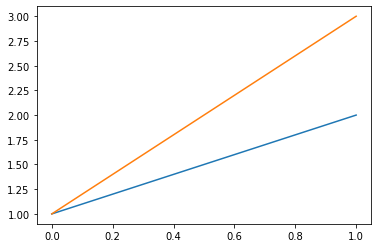

In [ ]:
plt.plot([1,2]) 
#Note: the interval for x will start at 0, and its length will be the same as the specified interval for y
plt.plot([1,3])
plt.show()

To create points on the xy plane, you must specify after your arrays with a specific marker, such as "o" or "*", or "x". To change the color, you can also add a marker such as "r" for red, "b" for blue, etc.

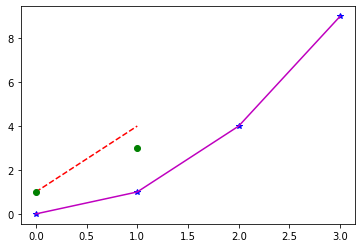

In [ ]:
plt.plot([1,4], "r--")
plt.plot([1,3], "go") #Note default x values will be 0,1
plt.plot([0,1,2,3], [0,1,4,9], "b*")
plt.plot([0,1,2,3], [0,1,4,9], "m")
plt.show()
#To learn more about the different markers, check out the documentation:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

## Histogram

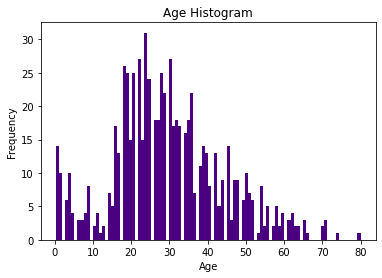

In [ ]:
plt.hist(titanic_df["Age"], bins = 100, color = ['indigo'])

plt.title('Age Histogram')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


#change the number of the bins and see what happens
#change the color to your favorite color

#To learn about more customizability, check out this documentation:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

## Scatter Plot

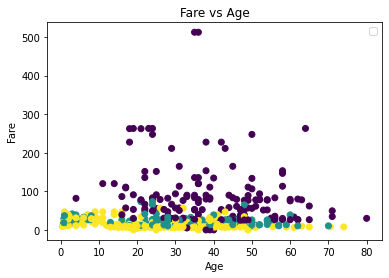

In [ ]:
plt.scatter(titanic_df["Age"], titanic_df["Fare"], c = titanic_df["Class"].values.ravel())

plt.title("Fare vs Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(scatterpoints =3)

plt.show()

#to see the unique values of a series:
#titanic_df["Class"].unique()

## Correlation Plot

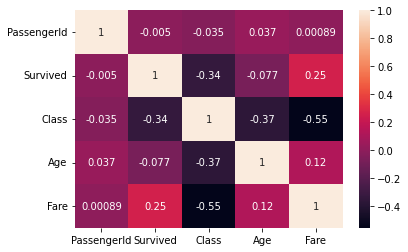

In [ ]:
corr = titanic_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

#If you don't want the numbers to show within the boxes, remove the [annot = True] parameter

### This correlation plot is a bit hard to read, and some of these correlations don't provide useful information. 
Question: How can we make this more readable/less compact? What columns can we remove? How can we remove columns from a dataset?

In [ ]:
#answer here

## Distribution Plots

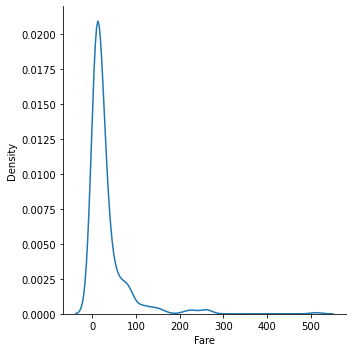

In [ ]:
sns.displot(data = titanic_df, x = "Fare", kind = "kde")
#Note: to turn into histogram, change kind = "hist" as the parameter

## Another Way of Visualizing the Titanic Data:

Countplot: counts of observations in each categorical bin using bars


<AxesSubplot:xlabel='Class', ylabel='count'>

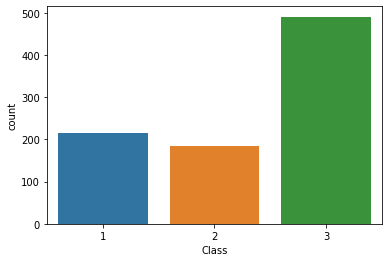

In [ ]:
sns.countplot(data = titanic_df, x = "Class")

Let's say we want to see what's the breakdown of whether or not people survived based on their ticket class. 

How can we do that? Use the documentation to determine which parameter to use.
https://seaborn.pydata.org/generated/seaborn.countplot.html

In [ ]:
#answer

# Linear Regressions with scikit-learn

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

## Simple Linear Regression Model

We seek to estimate the Simple Linear Regression Model using the Least Squares Regression Line y = mX+b, where m = slope, b = intercept. This is also known as the line of best fit.



Goal: Given *slope = 2*, *intercept = 3*, *X = [1,2,34,93]*, find *Y*, and then train a simple linear regression model where we can predict Y given X.

First, let's calculate y = mX+b to obtain our y values.

In [ ]:
slope = 2
intercept = 3
X = np.array([[1],[2],[34],[93]])
X

array([[ 1],
       [ 2],
       [34],
       [93]])

In [ ]:
y = X*slope + intercept
y

#X*slope

array([[  5],
       [  7],
       [ 71],
       [189]])

Note that [X\*slope] is not regular multiplication. [X] is an array of constants, so 
[X\*slope] is multiplying each constant in [X] by the constant [slope]. <br>
Uncomment the last line in the cell above to see for yourself.

### Now, on to the fitting the model.

When we are fitting the model, we are creating the equation y = (b_1)*x + b_0.

In [ ]:
model = LinearRegression()
fit = model.fit(X,y)
print(fit.coef_, fit.intercept_)

[[2.]] [3.]


Recall that we defined [X] as [ X = np.array([[1],[2],[34],[93]]) ]. The function fit requires that X has shape (# of samples, # of predictors). In this case, # of samples = 4, # of predictors = 1. To test that [X] is of that shape, run [X.shape].

Note that there are many different ways of making X have that shape. We will cover another way below.


### Let's now feed our fitted model the same x inputs to see if we obtain the same y outputs.

In [ ]:
fit.predict(X)

array([[  5.],
       [  7.],
       [ 71.],
       [189.]])

## Now, let's work with some actual data

For this section, we will use a different dataset. 

In [ ]:
salary_df = pd.read_csv("Salary_Data.csv")
salary_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
import pandas as pd

In [ ]:
salary_df.info()

NameError: ignored

In [ ]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Goal: predict salary based on years of experience

Point of Attack:
1. SPLIT THE DATA INTO **TRAINING** AND **TESTING** DATA
2. Specify our model
3. Fit model based on our **training** data
4. Predict with our model using our **testing input** data
5. Use an **accuracy** measure to determine the difference between our **testing output** data and **predictions**

### What is Training and Testing Data?

The train-test split procedure is a way to evaluate the performance of our model. It is important to assess our model on data that was not used to fit the model, or not used to estimate the slope and the intercept for a linear regression, so that we can have an unbiased evaluation of the prediction performance.

Now, let's jump into the coding

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#step 1
X_train, X_test, y_train, y_test = train_test_split(salary_df[["YearsExperience"]], salary_df["Salary"], test_size = 0.25)
#test size specifies the proportion of the dataset to include in the test split.

Let's briefly pause and see what has happened.

In [ ]:
print("length of X_train: " + str(len(X_train)), "\nlength of Y_train: " + str(len(y_train)), "\nlength of X_test: " + str(len(X_test)), \
      "\nlength of Y_test: " + str(len(y_test)))

#salary_df[["YearsExperience"]]
#uncomment to see what it looks like

length of X_train: 22 
length of Y_train: 22 
length of X_test: 8 
length of Y_test: 8


Remember: we have 30 data points, and our test split was 0.25, and 30*0.25 is roughly 8, so this makes sense.

### Fitting the Model and Obtaining our Predictions

Now, try to perform steps 2, 3, and 4 from above, where we fit the model with X_train and y_train, and X_test will represent the inputs we use to predict.

In [ ]:
#steps 2 & 3 & 4

### Accuracy Score

Now, we will use the testing data from our training-testing split on our model to evaluate how well our model predicts outputs.

In [ ]:
#step 5
#print("Score:", model.score(X_test, y_test))

### Plotting Question: Use one of the functions above to plot the test_inputs (X) with the predictions (Y) we obtained. Try to label your x- and y-axis as well. <br>

In [ ]:
#answer here

### Let's take a minute to compare our fitted values and our observed values (uncomment the code in the cell below). <br>

Fitted Values: what our model predicts when we feed it X_train. <br>
Observed Values: Y_train (output in our training set)

In [ ]:
# fitted_values = model.predict(X_train) 
# d = {"observed": y_train, "fitted": fitted_values, "residual": y_train - fitted_values}
# df = pd.DataFrame(data=d)
# df
#note the indices are funky because the data was split randomly into training and testing, and they kept their original indices from the dataset